In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import re

In [4]:
sub_4 = pd.read_csv("../data/US_Sub4_Milers_Database.csv")

In [5]:
sub_4.head()

,Year,Decade,Order,Name,Affiliation,Level,Time,Area,Location,State,Latitude,Longitude,Country,Date,Image
0,1957,1950s,1,Don Bowden,Cal,College,03:58.7,Outdoor,Stockton,CA,37.9577,-121.2908,United States,1-Jun,https://x2.pac-12.com/cdn/ff/wtnbGV5PHzzf8m22I...
1,1960,1960s,2,Dyrol Burleson,Oregon,College,03:58.6,Outdoor,Eugene,OR,44.0521,-123.0868,United States,23-Apr,https://bringbackthemile.com/images/sized/imag...
2,1960,1960s,3,Jim Beatty,Santa Clara Valley Youth Village,Pro & Open,03:58.0,Outdoor,Modesto,CA,37.6393,-120.9970,United States,28-May,https://trackandfieldnews.com/wp-content/uploa...
3,1962,1960s,4,Jim Grelle (Los Angeles TC),Los Angeles TC,Pro & Open,03:59.9,Outdoor,Walnut,CA,34.0203,-117.8653,United States,28-Apr,https://upload.wikimedia.org/wikipedia/commons...
4,1962,1960s,5,Keith Forman,Oregon,College,03:58.3,Outdoor,Modesto,CA,37.6393,-120.9970,United States,26-May,https://oregondigital.org/downloads/oregondigi...


In [6]:
sub_4.info

<bound method DataFrame.info of      Year Decade  Order                         Name  \
0    1957  1950s      1                   Don Bowden   
1    1960  1960s      2               Dyrol Burleson   
2    1960  1960s      3                   Jim Beatty   
3    1962  1960s      4  Jim Grelle (Los Angeles TC)   
4    1962  1960s      5                Keith Forman    
..    ...    ...    ...                          ...   
654  2022  2020s    655         Rheinhardt Harrison    
655  2022  2020s    656           Adam Bradtmueller    
656  2022  2020s    657                   Luke Combs   
657  2022  2020s    658               Joey Berriatua   
658  2022  2020s    659             Simeon Birnbaum    

                          Affiliation        Level     Time     Area  \
0                                 Cal      College  03:58.7  Outdoor   
1                              Oregon      College  03:58.6  Outdoor   
2    Santa Clara Valley Youth Village   Pro & Open  03:58.0  Outdoor   
3      

In [7]:
sub_4.shape

(659, 15)

In [8]:
print(sub_4.dtypes)

Year             int64
Decade          object
Order            int64
Name            object
Affiliation     object
Level           object
Time            object
Area            object
Location        object
State           object
Latitude       float64
Longitude      float64
Country         object
Date            object
Image           object
dtype: object


In [9]:
sub_4.describe()

,Year,Order,Latitude,Longitude
count,659.000000,659.000000,659.000000,659.000000
mean,2002.852807,330.000000,41.023717,-92.034083
std,17.641341,190.381197,6.023475,30.019016
min,1957.000000,1.000000,-39.933100,-123.262000
25%,1989.000000,165.500000,37.229600,-122.273000
50%,2010.000000,330.000000,41.705600,-86.781600
75%,2018.000000,494.500000,44.052100,-75.165200
max,2022.000000,659.000000,59.913900,175.028600


In [10]:
sub_4.corr

<bound method DataFrame.corr of      Year Decade  Order                         Name  \
0    1957  1950s      1                   Don Bowden   
1    1960  1960s      2               Dyrol Burleson   
2    1960  1960s      3                   Jim Beatty   
3    1962  1960s      4  Jim Grelle (Los Angeles TC)   
4    1962  1960s      5                Keith Forman    
..    ...    ...    ...                          ...   
654  2022  2020s    655         Rheinhardt Harrison    
655  2022  2020s    656           Adam Bradtmueller    
656  2022  2020s    657                   Luke Combs   
657  2022  2020s    658               Joey Berriatua   
658  2022  2020s    659             Simeon Birnbaum    

                          Affiliation        Level     Time     Area  \
0                                 Cal      College  03:58.7  Outdoor   
1                              Oregon      College  03:58.6  Outdoor   
2    Santa Clara Valley Youth Village   Pro & Open  03:58.0  Outdoor   
3      

We'll need to convert the Time column from object to float

In [ ]:
#sub_4 = sub_4.astype({"Time": float})

In [ ]:
#print(sub_4.dtypes)

Let's also make a separate column for the months

In [ ]:
#sub_4['Month'] = sub_4.Date.str[:]
#sub_4.head()

In [ ]:
#sub_4['Month'] = sub_4['Date'].str.extract('(\D{2})')

Let's see what months are in the database

In [ ]:
sub_4.Month.value_counts()

Now let's rename the month's to it's full name (Except May)

In [ ]:
#sub_4['Month'].replace({"Jan" : "January", 'Feb':"February",'Mar':"March",'Apr':"April",'Jun':"June",'Jul':"July",'Aug':"August",'Sep':"September",'Oct':"October",'Nov':"November",'Dec':"December"}, inplace=True)
sub_4.head()

Let's find what the average sub-4 miletime is for all the runners.

In [ ]:
#sub_4.Time.mean()

In [ ]:
#

Let's see how many Sub-4 miles were run indoors compared to outdoors and make a dataframe.

In [11]:
sub_4.Area.value_counts()

Indoor     355
Outdoor    304
Name: Area, dtype: int64

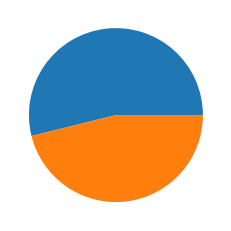

In [12]:
plt.pie(sub_4.Area.value_counts())
plt.show()

In [13]:
Season = pd.DataFrame(sub_4.Area.value_counts().reset_index())

In [14]:
Season.head()

,index,Area
0,Indoor,355
1,Outdoor,304


In [15]:
Season.columns = ['Season', 'Sub-4 Miles']
Season.head()

,Season,Sub-4 Miles
0,Indoor,355
1,Outdoor,304


In [16]:
Season['Percent'] = round((Season['Sub-4 Miles'] / 659) * 100,1)
Season.head()

,Season,Sub-4 Miles,Percent
0,Indoor,355,53.9
1,Outdoor,304,46.1


Where where most Sub-4 miles run by Americans?

In [17]:
sub_4.Location.value_counts()

Seattle         95
Boston          76
Eugene          48
Fayetteville    30
Nashville       26
                ..
Des Moines       1
Princeton        1
Lincoln          1
Cambridge        1
Gibsonton        1
Name: Location, Length: 121, dtype: int64

In [18]:
Location = pd.DataFrame(sub_4.Location.value_counts().reset_index())

In [19]:
Location.head()

,index,Location
0,Seattle,95
1,Boston,76
2,Eugene,48
3,Fayetteville,30
4,Nashville,26


In [20]:
Location.columns = ['City', 'Sub-4 Miles']
Location.head()

,City,Sub-4 Miles
0,Seattle,95
1,Boston,76
2,Eugene,48
3,Fayetteville,30
4,Nashville,26


In [21]:
Location['Percent'] = round((Location['Sub-4 Miles'] / 659) * 100,1)
Location.head()

,City,Sub-4 Miles,Percent
0,Seattle,95,14.4
1,Boston,76,11.5
2,Eugene,48,7.3
3,Fayetteville,30,4.6
4,Nashville,26,3.9


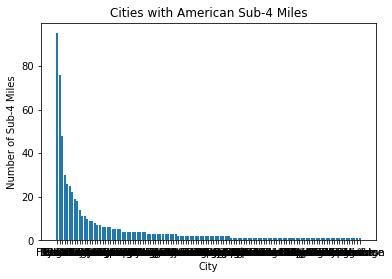

In [22]:
plt.bar(Location.City, Location['Sub-4 Miles'])
plt.title('Cities with American Sub-4 Miles')
plt.xlabel('City')
plt.ylabel('Number of Sub-4 Miles')
plt.show()

In [23]:
top10_cities = Location.nlargest(10,'Sub-4 Miles')
top10_cities.head()

,City,Sub-4 Miles,Percent
0,Seattle,95,14.4
1,Boston,76,11.5
2,Eugene,48,7.3
3,Fayetteville,30,4.6
4,Nashville,26,3.9


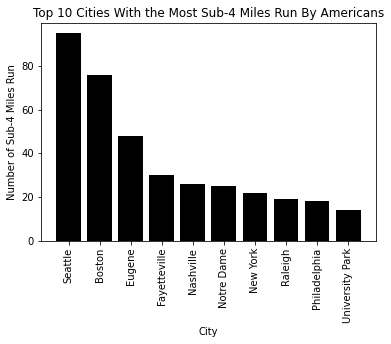

In [24]:
plt.bar(top10_cities.City,top10_cities['Sub-4 Miles'], color='black')
plt.title('Top 10 Cities With the Most Sub-4 Miles Run By Americans')
plt.xlabel('City')
plt.ylabel('Number of Sub-4 Miles Run')
plt.xticks(rotation = 90)
plt.show()

What team team and/or school produced the Sub-4 miles?

In [25]:
sub_4.Affiliation.value_counts()

unattached           50
Oregon               43
Nike                 18
Stanford             18
Athletics West       15
                     ..
 Arkansas             1
Indiana TC            1
Club Connecticut      1
New York Pioneers     1
South Dakota HS       1
Name: Affiliation, Length: 222, dtype: int64

In [26]:
Team = pd.DataFrame(sub_4.Affiliation.value_counts().reset_index())
Team.head()

,index,Affiliation
0,unattached,50
1,Oregon,43
2,Nike,18
3,Stanford,18
4,Athletics West,15


In [27]:
Team.columns = ['Team', 'Runners']
Team.head()

,Team,Runners
0,unattached,50
1,Oregon,43
2,Nike,18
3,Stanford,18
4,Athletics West,15


In [28]:
Team['Percent'] = round((Team['Runners'] / 659) * 100,1)
Team.head()

,Team,Runners,Percent
0,unattached,50,7.6
1,Oregon,43,6.5
2,Nike,18,2.7
3,Stanford,18,2.7
4,Athletics West,15,2.3


In [30]:
top10_teams = Team.nlargest(10,'Runners')
top10_teams.head()

,Team,Runners,Percent
0,unattached,50,7.6
1,Oregon,43,6.5
2,Nike,18,2.7
3,Stanford,18,2.7
4,Athletics West,15,2.3


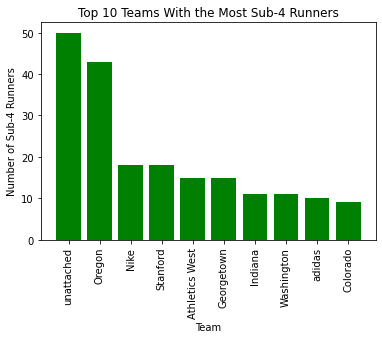

In [32]:
plt.bar(top10_teams.Team,top10_teams.Runners, color='green')
plt.title('Top 10 Teams With the Most Sub-4 Runners')
plt.xlabel('Team')
plt.ylabel('Number of Sub-4 Runners')
plt.xticks(rotation = 90)
plt.show()